In [31]:
#Autora: Adriana Álvarez F. 
# Since Collab is being used, it is necessary to install Pytorch
!pip install torch
import torch as torch

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import networkx as nx


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
def sigmoidalActivationFunction(x):
  return (1/(1+(torch.exp(-x))))


In [34]:
def matrixMultiplication(A, B):
    m, n = len(A), len(B)
    p = len(B[0])
    C = [[0 for _ in range(p)] for _ in range(m)]
    for i in range(m):
        for j in range(p):
            C[i][j] = sum([A[i][k] * B[k][j] for k in range(n)])
    return C

def sumBias(M, bias):
  for i in range(len(M)):
    for j in range(len(M[0])):
      M[i][j] += bias[i][0]
  return M

def forward(weights, bias, featuresT):
  weights = weights.tolist()
  bias = bias.tolist()
  featuresT = featuresT.tolist()
  result = matrixMultiplication(weights, featuresT)
  result = sumBias(result, bias) # Agregar la programación del bias
  result = torch.tensor(result)
  return sigmoidalActivationFunction(result)


In [35]:
def countRows(matrix):
  return matrix.size()[0]

In [36]:
def countColumns(matrix):
  return matrix.size()[1]

In [37]:
# Crea una matriz de tamano countHiddenLayer (rows) x countFeatures (columns) 
def randomWeights(rows, colums):
  return (torch.rand(rows, colums))


In [38]:
def calculateMSE(output, target):
    diff = output - target
    return torch.mean(torch.pow(diff, 2))

In [39]:
x = torch.tensor([[0.05, 0.01, 0.03], [0.02, 0.5, 0.1], [2, 4, 3]])
target = torch.tensor([[0.01], [0.5], [0.2]]) # Target
target = target.transpose(0,1)
rows=countRows(x) # corresponde a la cantidad de observaciones del dataset, es decir, a la cantidad de observaciones
columns=countColumns(x) #corresponde a la cantidad de features del dataset
countNeuronsHiddenLayer1=2
countNeuronsHiddenLayer2=2
weights1=randomWeights(countNeuronsHiddenLayer1, columns)
weights2=randomWeights(countNeuronsHiddenLayer2, columns)
bias1 = randomWeights(countNeuronsHiddenLayer1, 1) # Agregar la programación del bias
bias2 = randomWeights(countNeuronsHiddenLayer2, 1) # Agregar la programación del bias
featuresT=x.transpose(0,1)
r = forward(weights1, bias1, featuresT)
output = forward(weights2, bias2, r)
error = calculateMSE(output, target)
print("OUTPUT: ", r, '\n')
print("ERROR: ", error)

OUTPUT:  tensor([[0.7285, 0.7847, 0.9981],
        [0.5914, 0.7032, 0.9995]]) 

ERROR:  tensor(0.4228)


1. El valor de la r es una matriz de 1x3 obtenida de una red neuronal de una sola capa oculta con una única neurona. Está salida es resultado de la función forward que hace una multiplicación entre la matriz de features y la matriz de pesos al resultado le aplica una función sigmoide.

2. Se agregara una observación adicional al dataset de tal forma que quedaria de la siguente manera "x = torch.tensor([[0.05, 0.01], [0.02, 0.5], [2, 4], [1, 3]])"; por lo que ahora se tendria una dataset con 2 caracteristicas y 4 observaciones. 
Lo que va a suceder es que las funciones "countRows" y "countColumns" deben actualizarse para reflejar la nueva forma del tensor "x". "countRows" ahora debería retornar 4 y "countColumns" debería retornar 2. Finalmente se calculara el forward con la nueva matriz.

3. Se agregara una observación adicional al dataset de tal forma que quedaria de la siguente manera "x = torch.tensor([[0.05, 0.01, 0.03], [0.02, 0.5, 0.1], [2, 4, 3]])"; por lo que ahora se tendria una dataset con 3 caracteristicas y 3 observaciones. 
Lo que va a suceder es que las funciones "countRows" y "countColumns" que se usan en el código deberán actualizarse para reflejar la nueva forma del tensor "x". "countRows" ahora debería retornar 3 y "countColumns" debería retornar 3.Además, la matriz de pesos aleatorios generada por la función "randomWeights" deberá actualizarse para tener la forma (1, 3). Finalmente se calculara el forward con la nueva matriz.

4. Se modificó el código y acá está el dibujo.

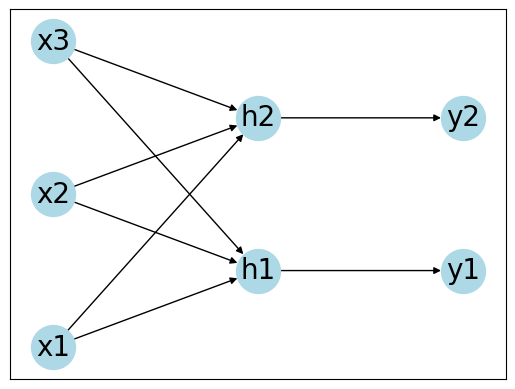

In [43]:
# Creamos un grafo dirigido
G = nx.DiGraph()

# Agregamos los nodos de entrada
G.add_node("x1")
G.add_node("x2")
G.add_node("x3")

# Agregamos la capa oculta
G.add_node("h1")
G.add_node("h2")
G.add_edge("x1", "h1")
G.add_edge("x2", "h1")
G.add_edge("x3", "h1")
G.add_edge("x1", "h2")
G.add_edge("x2", "h2")
G.add_edge("x3", "h2")

# Agregamos los nodos de salida
G.add_node("y1")
G.add_edge("h1", "y1")
G.add_node("y2")
G.add_edge("h2", "y2")


# Especificamos la posición de los nodos
pos = {"x1": (0, 0), "x2": (0, 1), "x3": (0, 2), "h1": (1, 0.5), "h2": (1, 1.5), "y1": (2, 0.5), "y2": (2, 1.5)}

# Dibujamos el grafo
nx.draw_networkx(G, pos=pos, node_color="lightblue", node_size=1000, font_size=20, with_labels=True)

# Mostramos el grafo
plt.show()

5. Para añadir la programación bias, en primer lugar se ha creado una matriz que calcula una matriz de una sola columna y con un número aleatorio para cada neurona. Luego de la función “forward” se le agregó el parámetro para recibir el bias, de igual manera se modificó esta función para que luego de realizar la multiplicación de matrices se le agregue el bias, finalmente devuelva la función sigmoidea del resultado anterior.

6. Se modificó el código y acá está el dibujo.

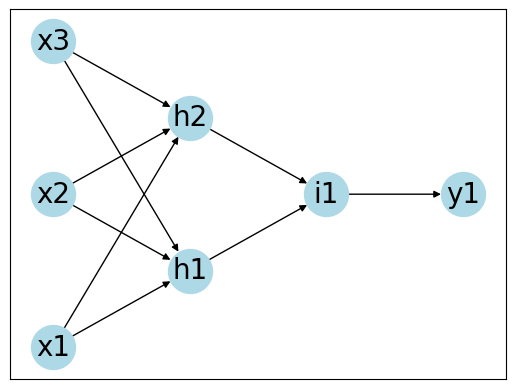

In [41]:
# Creamos un grafo dirigido
G = nx.DiGraph()

# Agregamos los nodos de entrada
G.add_node("x1")
G.add_node("x2")
G.add_node("x3")

# Agregamos la capa oculta
G.add_node("h1")
G.add_node("h2")
G.add_edge("x1", "h1")
G.add_edge("x2", "h1")
G.add_edge("x3", "h1")
G.add_edge("x1", "h2")
G.add_edge("x2", "h2")
G.add_edge("x3", "h2")

# Agregamos la capa oculta
G.add_node("i1")
G.add_edge("h1", "i1")
G.add_edge("h2", "i1")


# Agregamos los nodos de salida
G.add_node("y1")
G.add_edge("i1", "y1")

# Especificamos la posición de los nodos
pos = {"x1": (0, 0), "x2": (0, 1), "x3": (0, 2), "h1": (1, 0.5), "h2": (1, 1.5), "i1": (2, 1),"y1": (3, 1)}

# Dibujamos el grafo
nx.draw_networkx(G, pos=pos, node_color="lightblue", node_size=1000, font_size=20, with_labels=True)

# Mostramos el grafo
plt.show()

7. Se modificó el código y acá está el dibujo.

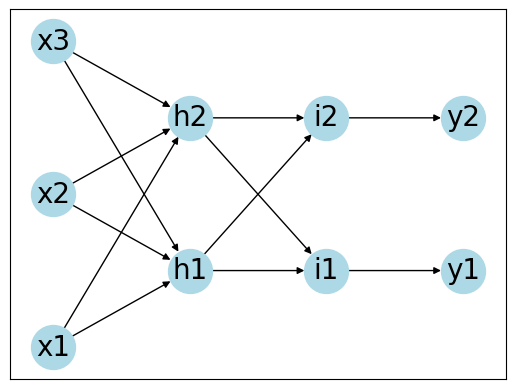

In [42]:
# Creamos un grafo dirigido
G = nx.DiGraph()

# Agregamos los nodos de entrada
G.add_node("x1")
G.add_node("x2")
G.add_node("x3")

# Agregamos la capa oculta
G.add_node("h1")
G.add_node("h2")
G.add_edge("x1", "h1")
G.add_edge("x2", "h1")
G.add_edge("x3", "h1")
G.add_edge("x1", "h2")
G.add_edge("x2", "h2")
G.add_edge("x3", "h2")

# Agregamos la capa oculta
G.add_node("i1")
G.add_node("i2")
G.add_edge("h1", "i1")
G.add_edge("h2", "i1")
G.add_edge("h1", "i2")
G.add_edge("h2", "i2")


# Agregamos los nodos de salida
G.add_node("y1")
G.add_edge("i1", "y1")
G.add_node("y2")
G.add_edge("i2", "y2")

# Especificamos la posición de los nodos
pos = {"x1": (0, 0), "x2": (0, 1), "x3": (0, 2), "h1": (1, 0.5), "h2": (1, 1.5), "i1": (2, 0.5), "i2": (2, 1.5), "y1": (3, 0.5), "y2": (3, 1.5)}

# Dibujamos el grafo
nx.draw_networkx(G, pos=pos, node_color="lightblue", node_size=1000, font_size=20, with_labels=True)

# Mostramos el grafo
plt.show()

8. Se modificó el código
9. Se agregó el target y la fórmula para calcular el error.